## Here all time dependend experiments can be plotted.
### doing this in one file ensures consistency and reduces redundancy

In [1]:
%run utilities.ipynb 
load_standard_packages()
change_wordir()
from matplotlib.lines import Line2D

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.58.0


In [23]:
colors, colours = colourblind_palette("own")

#analysis = "DIRKs"
analysis = "PIRKs"
#analysis = "PAM"

In [67]:
c_orig = checkpoint(".", f"cyclic_2021/{analysis}", filename="c")
v_orig = checkpoint(".", f"cyclic_2021/{analysis}", filename="v")
#NPQ_orig = checkpoint(".", f"cyclic_2021/{analysis}", filename="NPQ")

c_orig_ODE = checkpoint(".", f"cyclic_2021_ODE/{analysis}", filename="c")
v_orig_ODE = checkpoint(".", f"cyclic_2021_ODE/{analysis}", filename="v")
#NPQ_orig_ODE = checkpoint(".", f"cyclic_2021_ODE/{analysis}", filename="NPQ")

c_orig_ODE_v1 = checkpoint(".", f"cyclic_2021_ODE_v1/{analysis}", filename="c")
v_orig_ODE_v1 = checkpoint(".", f"cyclic_2021_ODE_v1/{analysis}", filename="v")

c_PSI = checkpoint(".", f"new_PSI/{analysis}", filename="c")
v_PSI = checkpoint(".", f"new_PSI/{analysis}", filename="v")

c_new_PSs = checkpoint(".", f"new_PSII/{analysis}", filename="c")
v_new_PSs = checkpoint(".", f"new_PSII/{analysis}", filename="v")

c_new_b6f = checkpoint(".", f"new_b6f/{analysis}", filename="c")
v_new_b6f = checkpoint(".", f"new_b6f/{analysis}", filename="v")

c_latest = checkpoint(".", f"latest_dev/{analysis}", filename="c")
v_latest = checkpoint(".", f"latest_dev/{analysis}", filename="v")
#NPQ_latest = checkpoint(".", f"latest_dev/{analysis}", filename="NPQ")

Loaded: data/cyclic_2021/PIRKs\c.joblib
Loaded: data/cyclic_2021/PIRKs\v.joblib
Loaded: data/cyclic_2021_ODE/PIRKs\c.joblib
Loaded: data/cyclic_2021_ODE/PIRKs\v.joblib
Loaded: data/latest_dev/PIRKs\c.joblib
Loaded: data/latest_dev/PIRKs\v.joblib


In [68]:
# display_t_window = (None, None) # plot everything
display_t_window = (-0.004, 0.01) # useful in PIRKS
#display_t_window = (119.5, 130)   # useful in PAM
#display_t_window = (-0.05, c_orig.index[-1]) # from 0 to end


In [69]:
# data_var_name: ["linestyle", linewidth]
models = {
        "orig": ["-", 1],
        "orig_ODE": [":", 2],
        # "PSI": ["--", 1],
        #"new_PSs": [":", 2],
        "latest": ["--", 1],
        #"new_b6f": ["-", 1]
        }

# [((0, (0.5, 2))), 2], [((0, (1, 2))), 2],

# electron carriers

Text(0, 0.5, 'metabolite concentration')

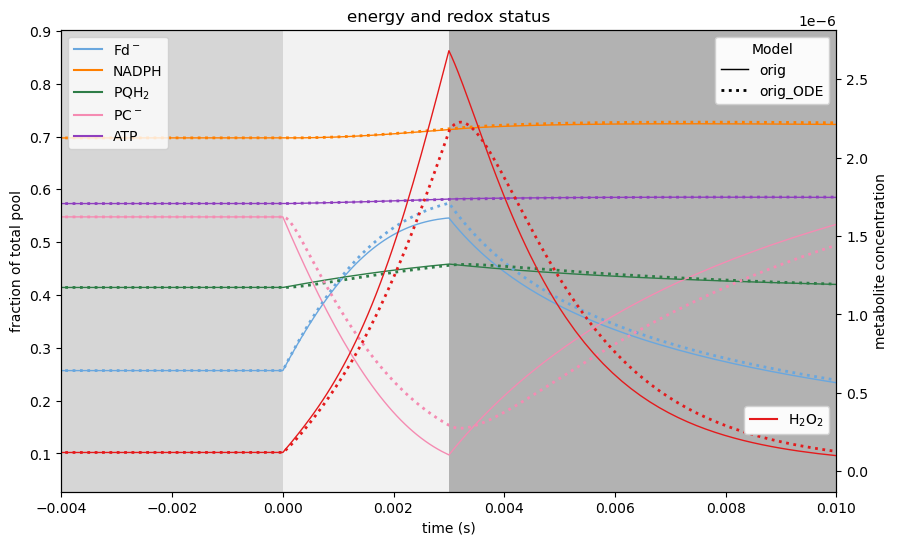

In [56]:
# ELECTRON CARRIERS

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
ax2 = ax1.twinx()

model_handles = []

for model_name, (style, width) in models.items():
        c_model = locals()[f"c_{model_name}"]  # Use locals() to access the variable by name
        ax1.plot(c_model["Fd_redoxstate"], label="Fd$^-$", color=colors[0], linestyle=style, linewidth=width)
        ax1.plot(c_model["NADP_redoxstate"], label="NADPH", color=colors[1], linestyle=style, linewidth=width)
        ax1.plot(c_model["PQ_redoxstate"], label="PQH$_2$", color=colors[2], linestyle=style, linewidth=width)
        ax1.plot(c_model["PC_redoxstate"], label="PC$^-$", color=colors[3], linestyle=style, linewidth=width)
        ax1.plot(c_model["ATP_norm"], label="ATP", color=colors[4], linestyle=style, linewidth=width)

        ax2.plot(c_model["H2O2"], label="H$_2$O$_2$", color=colors[5], linestyle=style, linewidth=width)

        model_handles.append(Line2D([0], [0], color='black', linestyle=style, lw=width, label=model_name))

shade_light(c_model, (ax1), max_alpha=0.3)

# Legends

metabolite_handles1 = [
        Line2D([0], [0], label="Fd$^-$", color=colors[0]),
        Line2D([0], [0], label="NADPH", color=colors[1]),
        Line2D([0], [0], label="PQH$_2$", color=colors[2]),
        Line2D([0], [0], label="PC$^-$", color=colors[3]),
        Line2D([0], [0], label="ATP", color=colors[4])
]
metabolite_handles2 = [
        Line2D([0], [0], label="H$_2$O$_2$", color=colors[5])
]

legend1 = ax1.legend(handles=metabolite_handles1, loc="upper left",  bbox_to_anchor=(0, 1))
legend2 = ax2.legend(handles=metabolite_handles2, loc="upper right", bbox_to_anchor=(1, 0.2))
ax1.add_artist(legend1)
ax2.add_artist(legend2)

if len(model_handles) > 1:
        model_legend = ax1.legend(handles=model_handles, title="Model", loc="upper right", bbox_to_anchor=(1, 1))
        ax1.add_artist(model_legend)

# Set labels and legends
ax1.set(title="energy and redox status",
        xlabel="time (s)",
        ylabel="fraction of total pool",
        #xlim=(-0.05, c_model.index[-1]),
        xlim=(display_t_window)
        )
ax2.set_ylabel("metabolite concentration")


In [58]:
save_fig(fig, list(models.keys()), analysis, f"electron_and_redox_status")

existing figure backed up to figures/comp/PIRKs/Z_backup_electron_and_redox_status_zoomed__orig_orig_ODE.png
saved figure to figures/comp/PIRKs/electron_and_redox_status_zoomed__orig_orig_ODE.png


# pH and Quencher

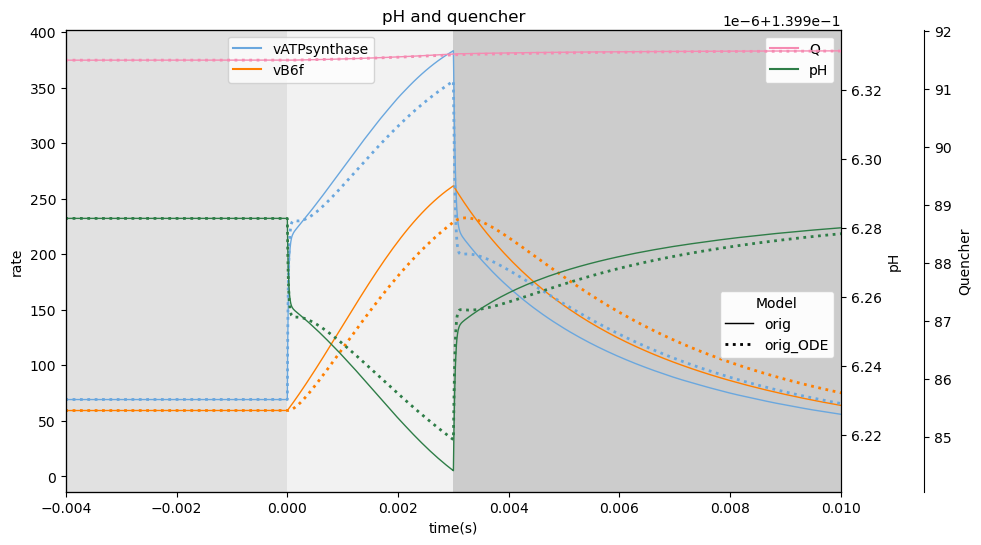

In [47]:
# pH and quencher

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis

model_handles = []

for model_name, (style, width) in models.items():
        c_model = locals()[f"c_{model_name}"]  # Use locals() to access the variable by name
        v_model = locals()[f"v_{model_name}"]  # Use locals() to access the variable by name

        ax1.plot(v_model["vATPsynthase"], label="vATPsynthase", color=colors[0], linestyle=style, lw=width)
        ax1.plot(v_model["vB6f"], label="vb6f", color=colors[1], linestyle=style, lw=width)

        ax2.plot(c_model["pH"], label="pH", color=colors[2], linestyle=style, lw=width)

        ax3.plot(c_model["Q"], label="Q", color=colors[3], linestyle=style, lw=width)

        model_handles.append(Line2D([0], [0], color='black', linestyle=style, lw=width, label=model_name))

shade_light(c_model, (ax1))

ax2.set_ylabel("pH")
ax3.set_ylabel("Quencher")

metabolite_handles1 = [
        Line2D([0], [0], label="vATPsynthase", color=colors[0]),
        Line2D([0], [0], label="vB6f", color=colors[1])
]
metabolite_handles2 = [
        Line2D([0], [0], label="Q", color=colors[3]),
        Line2D([0], [0], label="pH", color=colors[2]),
]

legend1 = ax1.legend(handles=metabolite_handles1, loc="upper left",  bbox_to_anchor=(0.2, 1))
legend2 = ax2.legend(handles=metabolite_handles2, loc="upper right", bbox_to_anchor=(1, 1))
ax1.add_artist(legend1)
ax2.add_artist(legend2)

if len(model_handles) > 1:
        model_legend = ax1.legend(handles=model_handles, title="Model", loc="upper right", bbox_to_anchor=(1, 0.45))
        ax1.add_artist(model_legend)

ax1.set(title="pH and quencher",
        xlabel="time(s)",
        ylabel="rate",
        #xlim=(-0.05, c.index[-1]),
        xlim=(display_t_window)
        )

fig.show()

In [48]:
save_fig(fig, list(models.keys()), analysis,  f"pH_and_Quencher")

existing figure backed up to figures/comp/PIRKs/Z_backup_pH_and_Quencher_zoomed__orig_orig_ODE.png
saved figure to figures/comp/PIRKs/pH_and_Quencher_zoomed__orig_orig_ODE.png


# electron fluxes

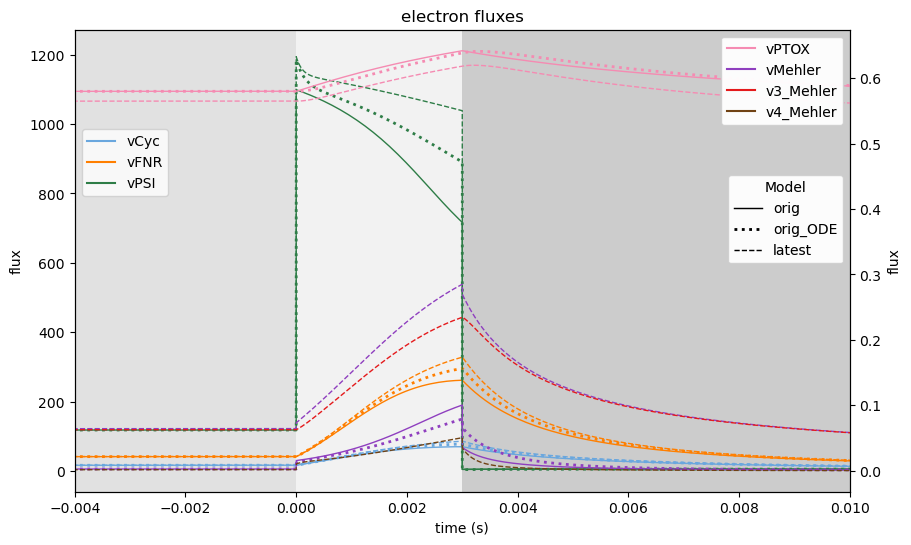

In [71]:
# ELECTRON FLUXES

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

model_handles = []

for model_name, (style, width) in models.items():
        v_model = locals()[f"v_{model_name}"]  # Use locals() to access the variable by name
        ax1.plot(v_model["vCyc"], label="vCyc", color=colors[0], linestyle=style, lw=width)
        ax1.plot(v_model["vFNR"], label="vFNR", color=colors[1], linestyle=style, lw=width)
        ax1.plot(v_model["vPS1"], label="vPS1", color=colors[2], linestyle=style, lw=width)
        # if model_name == "orig":
        #         ax1.plot(v_model["vPS2"]*2, label="vPS2", color=colors[2], linestyle=style, lw=width)
        # else:
        #         ax1.plot(v_model["vB20"], label="vPS2", color=colors[2], linestyle=style, lw=width)

        ax2.plot(v_model["vPTOX"], label="vPTOX", color=colors[3], linestyle=style, lw=width)
        if model_name not in ["orig", "orig_ODE"]:
                ax2.plot(v_model["v3_Mehler"]+v_model["v4_Mehler"], label="vMehler", color=colors[4], linestyle=style, lw=width)
                ax2.plot(v_model["v3_Mehler"], label="v3_Mehler", color=colors[5], linestyle=style, lw=width)
                ax2.plot(v_model["v4_Mehler"], label="v4_Mehler", color=colors[6], linestyle=style, lw=width)
        else:
                ax2.plot(v_model["vMehler"], label="vMehler", color=colors[4], linestyle=style, lw=width)

        model_handles.append(Line2D([0], [0], color='black', linestyle=style, lw=width, label=model_name))

shade_light(c_model, (ax1))

ax1.set(title="electron fluxes",
        xlabel="time (s)",
        ylabel="flux",
        #xlim=(119.5, 130),
        xlim=(display_t_window)
        )
ax2.set_ylabel("flux")

metabolite_handles1 = [
        Line2D([0], [0], label="vCyc", color=colors[0]),
        Line2D([0], [0], label="vFNR", color=colors[1]),
        Line2D([0], [0], label="vPSI", color=colors[2])
]
metabolite_handles2 = [
        Line2D([0], [0], label="vPTOX", color=colors[3]),
        Line2D([0], [0], label="vMehler", color=colors[4]),
        Line2D([0], [0], label="v3_Mehler", color=colors[5]),
        Line2D([0], [0], label="v4_Mehler", color=colors[6]),
]

legend1 = ax1.legend(handles=metabolite_handles1, loc="upper left",  bbox_to_anchor=(0, 0.8))
legend2 = ax2.legend(handles=metabolite_handles2, loc="upper right", bbox_to_anchor=(1, 1))
ax1.add_artist(legend1)
ax2.add_artist(legend2)

if len(model_handles) > 1:
        model_legend = ax1.legend(handles=model_handles, title="Model", loc="upper right", bbox_to_anchor=(1, 0.7))
        ax1.add_artist(model_legend)

#ax2.set_yscale('log')

fig.show()


In [53]:
save_fig(fig, list(models.keys()),analysis,  f"electron_fluxes")

saved figure to figures/comp/PIRKs/electron_fluxes_zoomed__orig_orig_ODE.png


# Photosystem 1

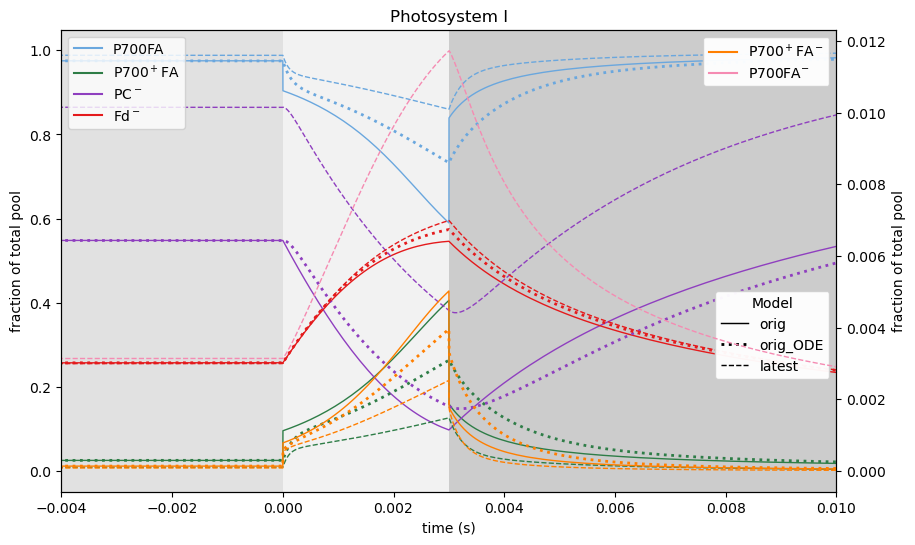

In [75]:
# Photosystem I

# ELECTRON CARRIERS

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
ax2 = ax1.twinx()
#ax3 = ax1.twinx()
#ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
#ax3.spines['right'].set_color('green')

model_handles = []

for model_name, (style, width) in models.items():
        c_model = locals()[f"c_{model_name}"]  # Use locals() to access the variable by name
        ax1.plot(c_model["rel_P700FA"], label="P700FA", color=colors[0], linestyle=style, linewidth=width)
        ax2.plot(c_model["rel_P700+FA-"], label="P700$^+$FA$^-$", color=colors[1], linestyle=style, linewidth=width)
        ax1.plot(c_model["rel_P700+FA"], label="P700$^+$FA", color =colors[2], linestyle=style, linewidth=width)

        if model_name not in ("orig", "orig_ODE", "c_orig_ODE_v1"):
                ax2.plot(c_model["rel_P700FA-"], label = "P700FA$^{-}$", color=colors[3], linestyle=style, linewidth=width)

        ax1.plot(c_model["PC_redoxstate"], label="PC_red", color=colors[4], linestyle=style, linewidth=width)
        ax1.plot(c_model["Fd_redoxstate"], label="Fd_red", color=colors[5], linestyle=style, linewidth=width)

        model_handles.append(Line2D([0], [0], color='black', linestyle=style, lw=width, label=model_name))

shade_light(c_model, ax1)

# Set labels and legends
ax1.set(title="Photosystem I",
        xlabel="time (s)",
        ylabel="fraction of total pool",
        #xlim=(-0.05, c_model.index[-1]),
        xlim=(display_t_window)
        )
ax2.set_ylabel("fraction of total pool")

# Legends

metabolite_handles1 = [
        Line2D([0], [0], label="P700FA", color=colors[0]),
        Line2D([0], [0], label="P700$^+$FA", color=colors[2]),
        Line2D([0], [0], label="PC$^-$", color=colors[4]),
        Line2D([0], [0], label="Fd$^-$", color=colors[5])
]
metabolite_handles2 = [
        Line2D([0], [0], label="P700$^+$FA$^-$", color=colors[1]),
        Line2D([0], [0], label="P700FA$^{-}$", color=colors[3])
]

legend1 = ax1.legend(handles=metabolite_handles1, loc="upper left",  bbox_to_anchor=(0, 1))
legend2 = ax2.legend(handles=metabolite_handles2, loc="upper right", bbox_to_anchor=(1,1))
ax1.add_artist(legend1)
ax2.add_artist(legend2)

if len(model_handles) > 1:
        model_legend = ax1.legend(handles=model_handles, title="Model", loc="upper right", bbox_to_anchor=(1, 0.45))
        ax1.add_artist(model_legend)

# ax1.legend(loc="upper left", bbox_to_anchor=(0.06, 1))
# ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.2))

In [55]:
save_fig(fig, list(models.keys()), analysis, f"PSI")

saved figure to figures/comp/PIRKs/PSI_zoomed__orig_orig_ODE.png


# PAM Fluorescence and NPQ

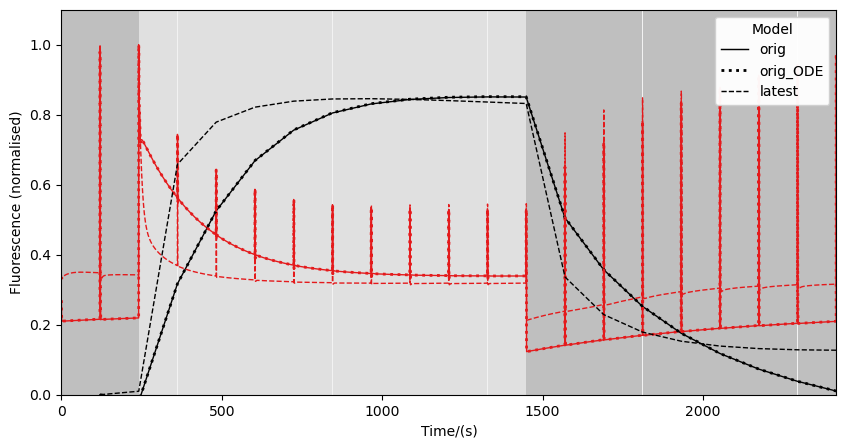

In [18]:
# PAM Fluorescence and NPQ

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
model_handles = []

for model_name, (style, width) in models.items():
    c_model = locals()[f"c_{model_name}"]
    NPQ_model = locals()[f"NPQ_{model_name}"]

    ax.plot(c_model["Fluo"] / c_model["Fluo"].max(), 
        color=colours["red"], 
        linestyle=style, 
        linewidth=width, 
        label=f"Fluo ({model_name})"
    )
    ax.plot(NPQ_model["tm"], NPQ_model["NPQ"], #tm is the time of the peaks 
        linestyle=style, 
        color="black", 
        linewidth=width, 
        label=f"NPQ ({model_name})"
    )

    model_handles.append(Line2D([0], [0], color='black', linestyle=style, lw=width, label=model_name))

shade_light(c_model, (ax), max_alpha=0.25)

ax.set(
    ylim=(0, 1.1),
    xlim=display_t_window,
    ##xlim=(120.5, 121),
    xlabel="Time/(s)",
    ylabel="Fluorescence (normalised)",
)

if len(model_handles) > 1:
    model_legend = ax.legend(handles=model_handles, title="Model", loc="upper right", bbox_to_anchor=(1, 1))
    ax.add_artist(model_legend)
